In [1]:
import torch

a = torch.randn(3)
b = torch.randn(3)
c = torch.randn(3)

a_a = torch.dot(a,a)
a_b = torch.dot(a,b)
a_c = torch.dot(a,c)
b_b = torch.dot(b,b)
b_c = torch.dot(b,c)
c_c = torch.dot(c,c)

def get_sig(t):
    sig = torch.sigmoid(t)
    return sig

t_a = torch.tensor([a_a, a_b, a_c])
t_b = torch.tensor([a_b, b_b, b_c])
t_c = torch.tensor([a_c, b_c, c_c]) 

print(t_a, t_b, t_c)

a_sig = get_sig(t_a)
b_sig = get_sig(t_b)
c_sig = get_sig(t_c)

print(a_sig, b_sig, c_sig)

a_emb = a_sig[0] * a + a_sig[1] * b + a_sig[2] * c
b_emb = b_sig[0] * a + b_sig[1] * b + b_sig[2] * c
c_emb = c_sig[0] * a + c_sig[1] * b + c_sig[2] * c

print(a_emb, b_emb, c_emb)

tensor([ 2.6309, -2.2643, -0.1539]) tensor([-2.2643,  2.1011,  0.4510]) tensor([-0.1539,  0.4510,  0.8151])
tensor([0.9328, 0.0941, 0.4616]) tensor([0.0941, 0.8910, 0.6109]) tensor([0.4616, 0.6109, 0.6932])
tensor([-0.8922, -0.4738,  0.9850]) tensor([-0.1068, -0.3048, -1.4088]) tensor([-0.5052, -0.4592, -0.5260])


In [2]:
X = torch.stack([a, b, c]) 
G = X @ X.T
S = torch.sigmoid(G) 
embeddings = S @ X 
embeddings

tensor([[-0.8922, -0.4738,  0.9850],
        [-0.1068, -0.3048, -1.4088],
        [-0.5052, -0.4592, -0.5260]])

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [1]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# 1. Convert tensor to NumPy and reduce to 3D
embedding_np = output.detach().numpy()  # shape: (seq_len, embed_dim)
pca = PCA(n_components=3)
reduced = pca.fit_transform(embedding_np)  # shape: (seq_len, 3)

# 2. Split coordinates
x, y, z = reduced[:, 0], reduced[:, 1], reduced[:, 2]

# 3. Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    text=tokens,
    textposition='top center',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D Visualization of Self-Attended Word Embeddings',
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    )
)

fig.show()

NameError: name 'output' is not defined

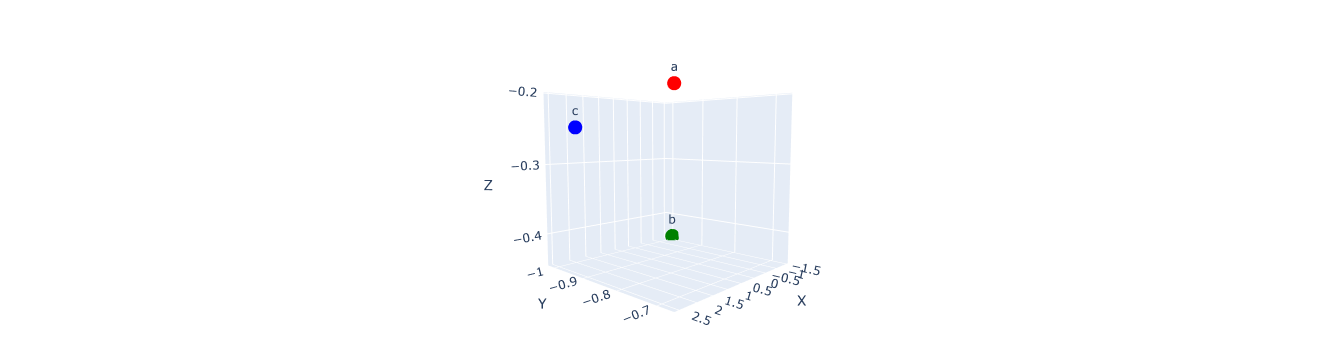

In [23]:
import torch
import plotly.graph_objects as go

points = torch.stack([a_emb, b_emb, c_emb])

x, y, z = points[:, 0].numpy(), points[:, 1].numpy(), points[:, 2].numpy()

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(size=8, color=['red', 'green', 'blue']),
    text=['a', 'b', 'c'],
    textposition='top center'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()
